# Credit Card Fraud Detection Logistic Regression Model
- Disclamer: The data I got from one of the Kaggle data sources.
- Data can be downloaded from https://www.kaggle.com/, Sincere thanks to Kaggle.com to provide very useful datasets for analysis.
- Due to privacy reasons, data doesn't have actual columns names except transaction time and amount.
- I will try to build Regression model to detect fraudlent transactions

### This model is based on Supervised learning because labels are provided for fraud and non fraud transactions

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn import metrics
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', 200)

In [3]:
creditDataFrame = pd.read_csv("creditcard.csv", encoding = 'unicode_escape')

In [4]:
print(creditDataFrame.shape)
print(creditDataFrame.size)

(284807, 31)
8829017


In [5]:
creditDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Most of the columns except Amount column are already scaled by StandardScaler method
#### However we still have to scale the Amount column

In [6]:
creditDataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning and Preparation

### Remove Time Column
- Time column is not useful for model traning

In [7]:
creditDataFrame.drop(columns= ['Time'], inplace=True)

### Scaling the amount column
- We can use either Standard Scaler or MinMaxScaler
- Since StandardScaler is used for scaling the other columns so I will use the same for Amount

In [8]:
stdScaler = StandardScaler()
creditDataFrame[['Amount']] = stdScaler.fit_transform(creditDataFrame[['Amount']])
creditDataFrame.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Check Data Imbalance for target variable 'class' (fraud or non fraud)
- This data is quite imbalanced
- Around 99.8 percent transactions are genuine transactions
- Around 0.17 (492) percent are fraudlent transactions

0    99.827251
1     0.172749
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


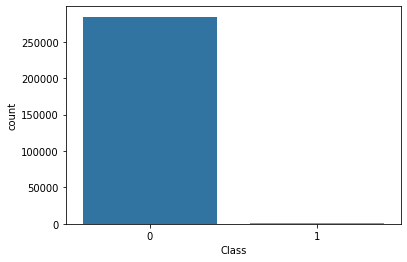

In [9]:
print(creditDataFrame['Class'].value_counts()/len(creditDataFrame)*100)
print(creditDataFrame['Class'].value_counts())

sns.countplot(creditDataFrame['Class'])

## Treating the imbalance of data

#### I will be using Random Stratified sampling to treat the imbalance of data.
#### For this, I will be using random indices to get the non fraud data and will concat for fraud data so that we have 50-50% of distribution of the data for both classes

In [10]:
def getRandomNonFraudData(df):
    random.seed(100)
    nonFraudDF = df[df['Class'] == 0]
    numbers = random.choice(len(nonFraudDF), size=492, replace=False)
    return nonFraudDF.iloc[numbers]


In [11]:
nonFraudDF = getRandomNonFraudData(creditDataFrame)
fraudDF = creditDataFrame[creditDataFrame['Class'] == 1]
mergedDF = pd.concat([nonFraudDF, fraudDF])
mergedDF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
222369,0.046137,0.881214,0.302074,-0.585253,0.417586,-1.128904,1.018863,-0.216100,-0.066571,-0.414195,-0.893916,0.218126,0.153772,0.083759,-0.420013,-0.102904,-0.413578,-0.769687,-0.087970,-0.032461,-0.259028,-0.557688,0.066127,0.043527,-0.486044,0.137287,0.248573,0.097720,-0.345273,0
103444,-1.591957,1.713539,0.269043,0.064271,-0.790288,-0.398922,-0.009796,0.833390,0.186435,-0.156110,-1.486602,0.336209,0.089528,0.204522,-0.412324,-0.024602,0.166984,-0.358893,0.442217,0.068558,-0.215774,-0.492714,-0.039830,-0.100515,0.270056,0.276989,0.096303,0.060185,-0.197104,0
81835,1.205217,-0.143317,0.341558,0.650223,-0.286586,0.118432,-0.253357,0.091103,0.744127,-0.258851,-1.090922,0.104963,-0.533534,-0.089991,-0.043471,-0.480765,0.231675,-0.807776,0.050773,-0.151790,-0.098941,-0.044282,-0.116956,-0.373154,0.535269,0.605666,-0.013150,0.001013,-0.293298,0
241973,0.094646,0.746711,-0.050365,-0.748041,0.651131,-0.726142,0.908008,-0.083481,0.209904,-0.371125,-1.827976,-0.823861,-1.198775,0.334132,-0.201137,0.189127,-0.605418,-0.338258,0.208374,-0.098387,-0.324887,-0.819738,-0.005201,-0.759517,-0.433912,0.189392,0.237128,0.086976,-0.337277,0
197355,-2.506276,-3.830851,-2.597559,-1.185391,-5.755348,1.366631,7.924229,-2.264307,-3.062299,0.411020,-0.032772,-2.108748,-0.355011,-0.161043,-0.401857,-1.369351,0.782556,-0.191659,-0.031078,0.100727,0.050375,1.316135,1.640480,1.005380,0.784796,0.279200,0.325590,-0.631457,6.575454,0


In [12]:
mergedDF.shape

(984, 30)

## Exploratory Data Analysis
- All the columns are normally distributed around mean=0 which is the result of standard scaling.
- if Standard scaling would not have done then dist plot could have given real picture of the data. (Anyways)
- 'Amount' column distribution seems to be quite skewed and gives the indication of outliers present in the data.

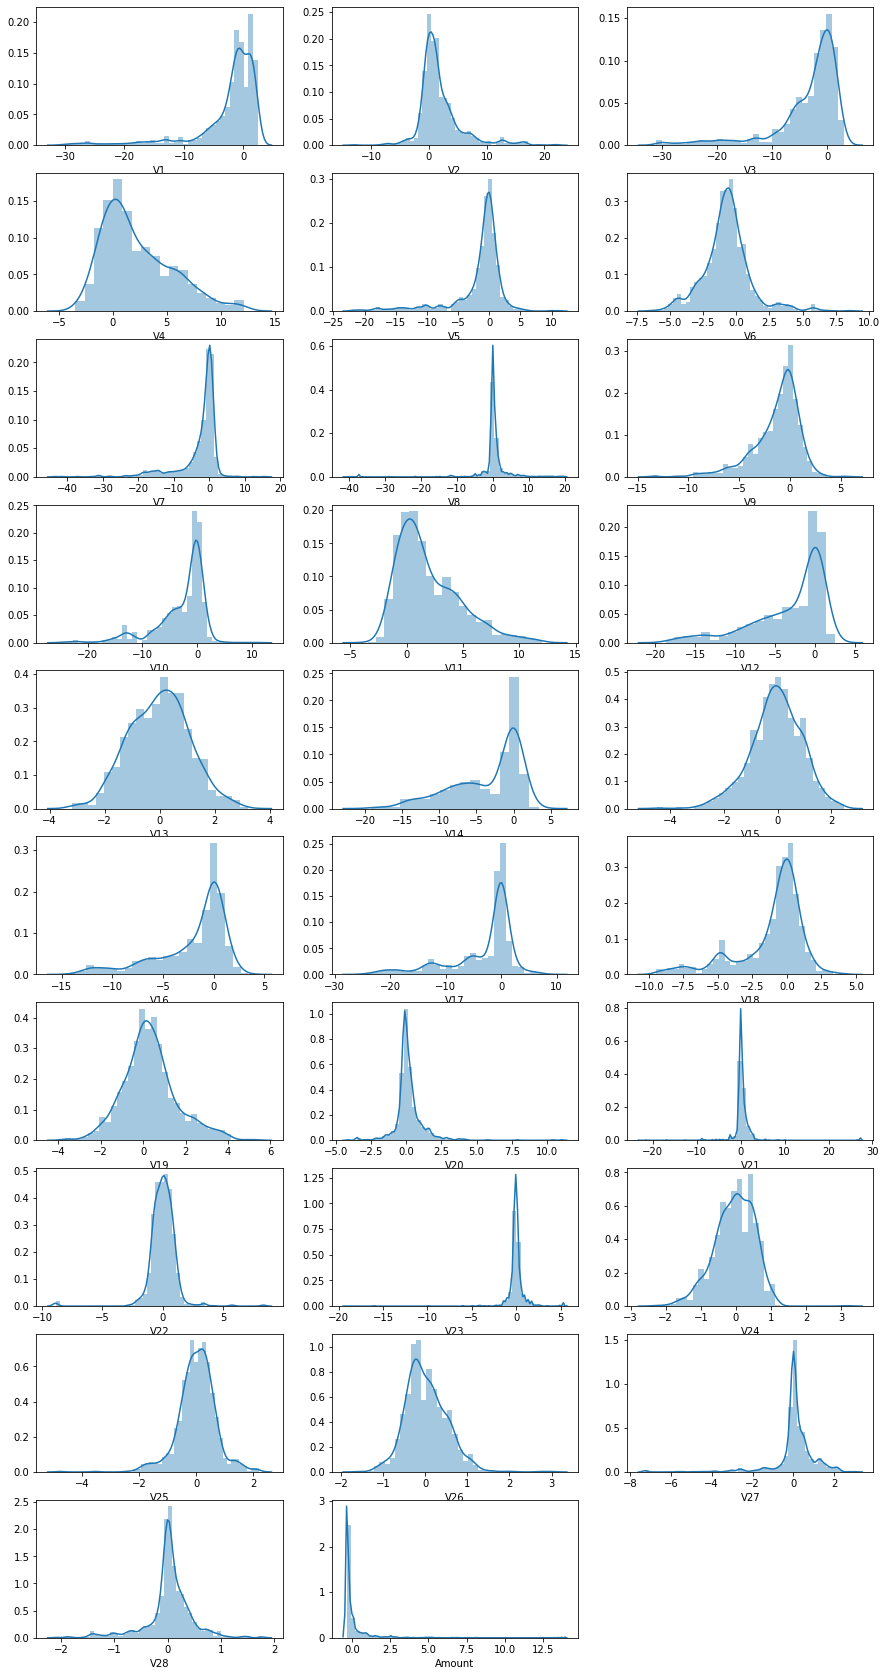

In [13]:
plt.figure(figsize  = (15,30))
for i in enumerate(mergedDF.columns.drop('Class')):
    plt.subplot(10, 3, i[0]+1)
    sns.distplot(mergedDF[i[1]])

## Finding Outliers
- We can clearly see the outliers most of the columns.
- We will have to treat the outlier because they may influence and dominate while building the models
- Those outlier may not present in the test set which can impact the overall accuracy of the model.

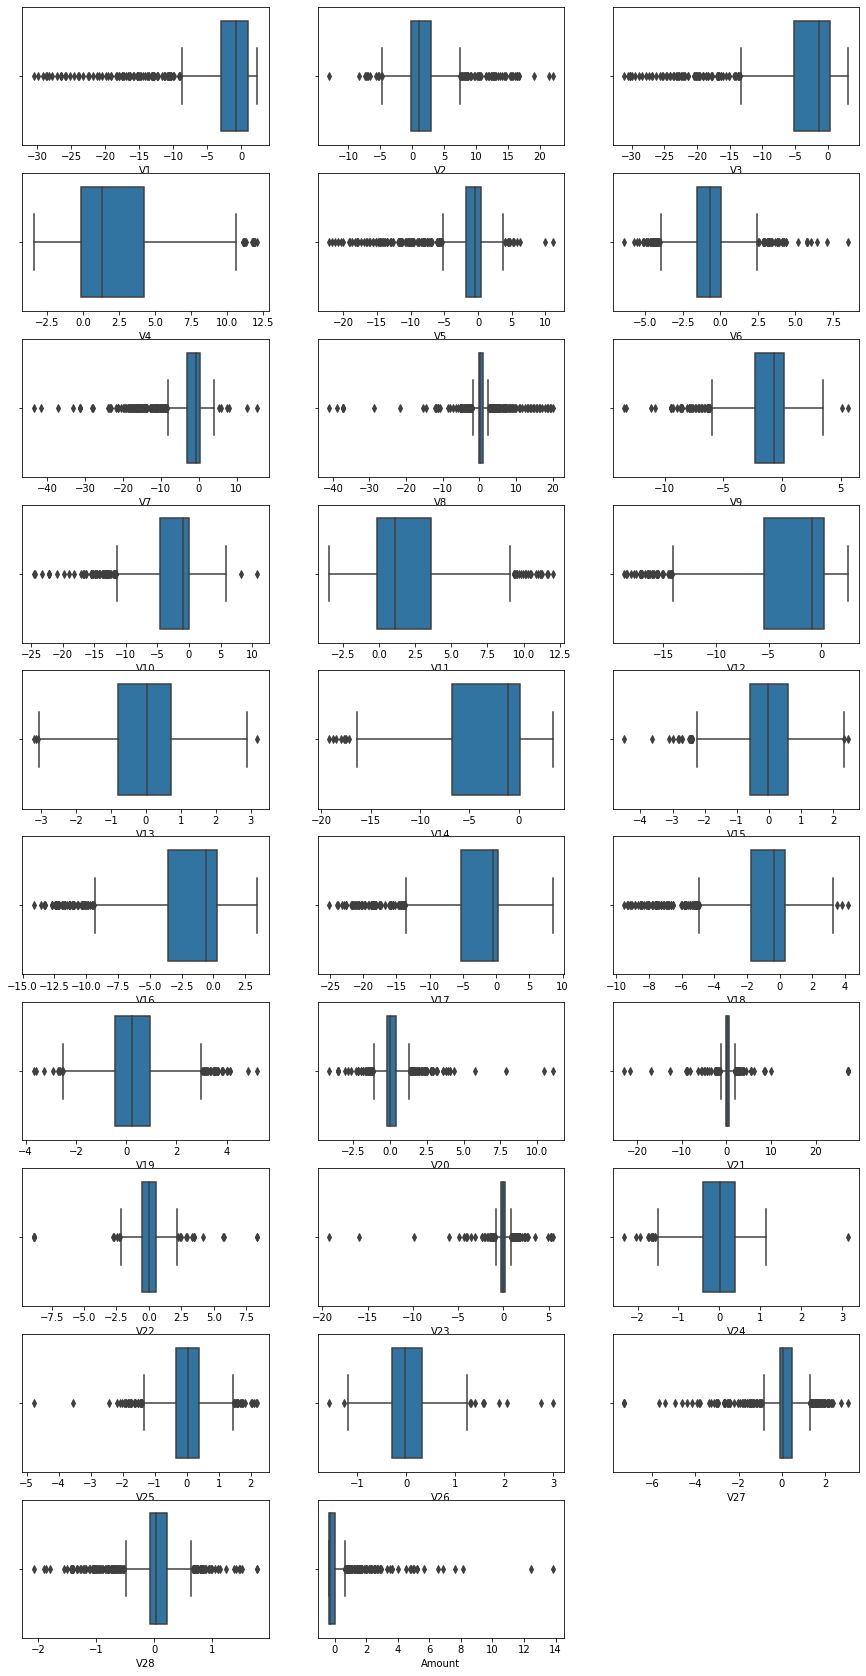

In [14]:
plt.figure(figsize  = (15,30))
for i in enumerate(mergedDF.columns.drop('Class')):
    plt.subplot(10, 3, i[0]+1)
    sns.boxplot(data=mergedDF, x=i[1])

### Treating the outliers
- There are two ways to treat the outliers
  - Delete those rows
  - Impute the values based on inter quartile range (IQR)
- I will use *soft outlier treatment* to avoid any data loss.
- [Q1, Q3] which is lower quantile range 5% and Higher quantile range 95%

In [15]:
def treatOutliers(col):
    q4 = mergedDF[col].quantile(0.95)
    mergedDF[col][mergedDF[col] >=  q4] = q4
    
    q1 = mergedDF[col].quantile(0.05)
    mergedDF[col][mergedDF[col] <=  q1] = q1

In [16]:
for i in enumerate(mergedDF.columns.drop('Class')):
    treatOutliers(i[1])

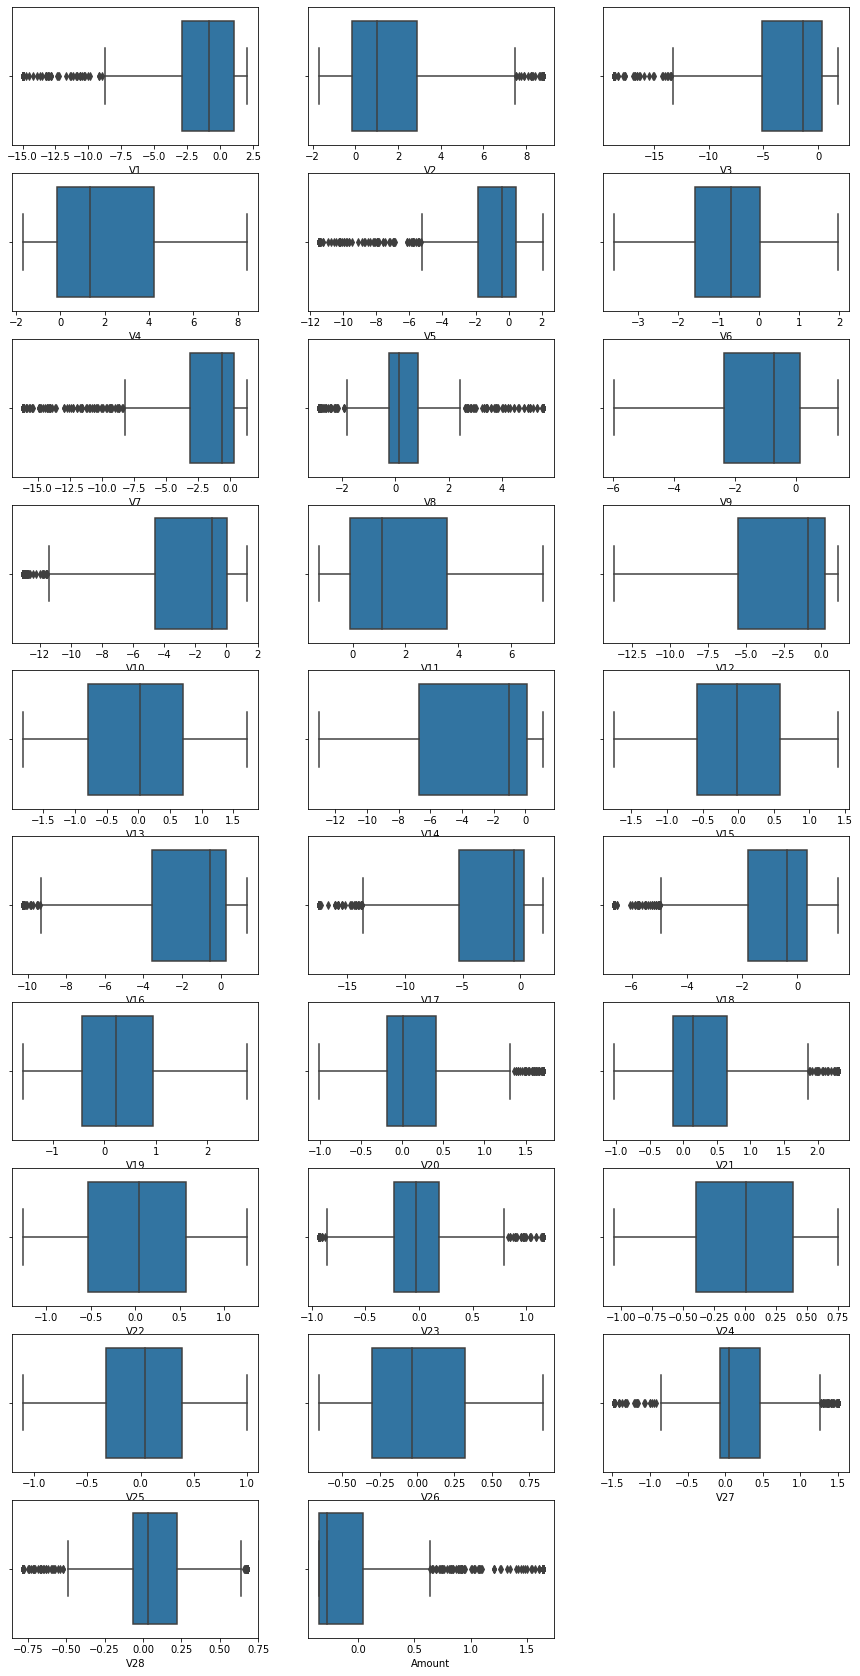

In [17]:
## We can see outliers are treated well and data is much better condition now.

plt.figure(figsize  = (15,30))
for i in enumerate(mergedDF.columns.drop('Class')):
    plt.subplot(10, 3, i[0]+1)
    sns.boxplot(data=mergedDF, x=i[1])

### Top 10 highly corelated variables
- Below are Top 10 highly co-related values
- Variables are quite co-related with each other and redundant
- We will have to choose right and independent variables while feature selection.

In [18]:
corr = mergedDF.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace=True)
corr_df['Correlation'] = round(corr_df['Correlation'].abs(), 2)
corr_df.sort_values(by = 'Correlation', ascending=False).head(10)

,Variable1,Variable2,Correlation
495,V17,V16,0.95
526,V18,V17,0.94
339,V12,V10,0.92
525,V18,V16,0.91
489,V17,V10,0.90
340,V12,V11,0.90
461,V16,V12,0.90
182,V7,V3,0.90
459,V16,V10,0.90
180,V7,V1,0.89


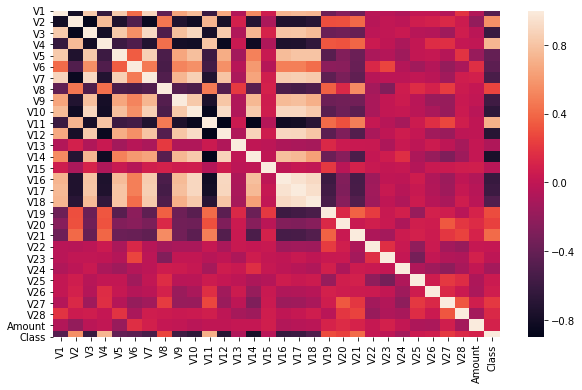

In [67]:
plt.figure(figsize  = (10,6))
sns.heatmap(mergedDF.corr())

## Model Creation

### Divide Data in Train and Test set

In [20]:
train_set, test_set = train_test_split(mergedDF, train_size=0.7, random_state=100)

In [21]:
print(train_set.shape)
print(test_set.shape)

(688, 30)
(296, 30)


In [22]:
# Futher divide the dataset in X_train and y_train
y_train = train_set.pop('Class')
X_train = train_set

### Feature selection using RFE

In [23]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [24]:
#useful columns according to rfe
useful_cols = X_train.columns[rfe.support_]
useful_cols

Index(['V4', 'V5', 'V8', 'V10', 'V12', 'V13', 'V14', 'V16', 'V20', 'V22',
       'V23', 'V25', 'V27', 'V28', 'Amount'],
      dtype='object')

In [25]:
# Not useful columns according to rfe
X_train.columns[~rfe.support_]

Index(['V1', 'V2', 'V3', 'V6', 'V7', 'V9', 'V11', 'V15', 'V17', 'V18', 'V19',
       'V21', 'V24', 'V26'],
      dtype='object')

### Select only useful columns

In [26]:
X_train_rfe = X_train[useful_cols]
X_train_rfe.head()

,V4,V5,V8,V10,V12,V13,V14,V16,V20,V22,V23,V25,V27,V28,Amount
8895,0.519576,-0.929863,-0.268405,-0.745434,-1.654215,1.718422,1.083739,-0.567640,-0.117213,-0.143888,0.011088,0.360569,-0.091284,0.000443,-0.313648
5777,3.089681,0.137970,-0.097180,0.855759,-2.615075,1.718422,0.631090,-0.315948,0.492389,0.527635,-0.170193,-0.164966,0.362369,0.074375,-0.193506
5866,1.583495,-0.392022,0.342203,-0.416496,-2.041163,-0.069314,1.083739,-0.486975,-0.301557,-0.129639,-0.100178,0.552539,0.031237,0.000776,-0.293258
10497,3.024050,0.412406,-0.110353,-0.554224,-2.776757,1.641207,-0.456077,0.857323,-0.143435,-1.047398,-0.056752,0.541235,-0.003041,0.049819,-0.338077
35722,0.694626,-0.385154,-0.194959,-0.277905,0.152928,0.071441,-0.256888,0.485648,-0.091662,-0.842265,0.131665,0.211031,-0.023988,0.030407,-0.348072


### Train the Model

In [27]:
def checkVIF():
    vif = pd.DataFrame()
    vif['Feaures'] = X_train_sm.columns
    vif['VIF'] = [VIF(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [28]:
# Logistic Regression Model
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  688
Model:                            GLM   Df Residuals:                      672
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -79.650
Date:                Sat, 10 Oct 2020   Deviance:                       159.30
Time:                        18:36:09   Pearson chi2:                     224.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8853      0.407     -9.552      0.000      -4.683      -3.088
V4             0.9763      0.173      5.634      0.000       0.637       1.316
V5             0.5721      0.175      3.274      0.001       0.230       0.915
V8            -0.7592      0.234     -3.240      0.001      -1.218      -0.300
V10           -0.4284      0.292     -1.467      0.142      -1.001       0.144
V12           -0.4194      0.208     -2.017      0.044      -0.827      -0.012
V13           -0.3643      0.226     -1.614      0.107      -0.807       0.078
V14           -1.1032      0.237     -4.650      0.000      -1.568      -0.638
V16           -0.2946      0.257     -1.148      0.251      -0.797       0.208
V20           -0.6877      0.446     -1.541      0.123      -1.562       0.187
V22            0.5324      0.370      1.438      0.150      -0.193       1.258
V23            1.4654      0.607      2.413      0.016       0.275       2.656
V25            0.4706      0.437      1.078      0.281      -0.385       1.326
V27            0.9454      0.581      1.626      0.104      -0.194       2.085
V28            2.0496      0.883      2.321      0.020       0.318       3.781
Amount         0.8502      0.413      2.057      0.040       0.040       1.660
==============================================================================
"""

### Manual Feature Elimination

#### Calculate VIF values to check co-relation between independent variables

In [29]:
checkVIF()

,Feaures,VIF
4,V10,13.755894
5,V12,13.563501
8,V16,8.446560
7,V14,7.526646
1,V4,4.181066
2,V5,4.167541
3,V8,1.899677
0,const,1.744953
9,V20,1.573621
14,V28,1.474928


#### Remove the columns with very High VIF
- these variables need to be removed to fix Multi colinearity in the data

In [30]:
X_train_sm = X_train_sm.drop(columns=['V10', 'V12', 'V16'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  688
Model:                            GLM   Df Residuals:                      675
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87.153
Date:                Sat, 10 Oct 2020   Deviance:                       174.31
Time:                        18:36:09   Pearson chi2:                     264.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8805      0.396     -9.788      0.000      -4.658      -3.104
V4             1.0705      0.148      7.209      0.000       0.779       1.362
V5             0.3275      0.113      2.901      0.004       0.106       0.549
V8            -0.6689      0.198     -3.371      0.001      -1.058      -0.280
V13           -0.2449      0.212     -1.155      0.248      -0.661       0.171
V14           -1.5289      0.193     -7.907      0.000      -1.908      -1.150
V20           -0.4954      0.354     -1.401      0.161      -1.188       0.198
V22            0.6027      0.327      1.844      0.065      -0.038       1.243
V23            1.5953      0.582      2.741      0.006       0.455       2.736
V25            0.5172      0.403      1.282      0.200      -0.273       1.308
V27            0.8901      0.473      1.884      0.060      -0.036       1.816
V28            2.0512      0.789      2.599      0.009       0.504       3.598
Amount         0.7179      0.371      1.936      0.053      -0.009       1.445
==============================================================================
"""

In [31]:
checkVIF()

,Feaures,VIF
1,V4,3.829388
5,V14,3.618473
2,V5,2.199047
3,V8,1.849910
0,const,1.732766
6,V20,1.402957
11,V28,1.361617
10,V27,1.332276
8,V23,1.302067
9,V25,1.202949


#### Remove the column with High P-Value
- These columns needs to be removed because these are very in-significant variables in the data

In [32]:
X_train_sm = X_train_sm.drop(columns=['V13'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  688
Model:                            GLM   Df Residuals:                      676
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87.829
Date:                Sat, 10 Oct 2020   Deviance:                       175.66
Time:                        18:36:09   Pearson chi2:                     284.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8843      0.397     -9.783      0.000      -4.662      -3.106
V4             1.0717      0.148      7.262      0.000       0.782       1.361
V5             0.3200      0.111      2.875      0.004       0.102       0.538
V8            -0.7007      0.197     -3.561      0.000      -1.086      -0.315
V14           -1.5238      0.191     -7.988      0.000      -1.898      -1.150
V20           -0.5223      0.350     -1.492      0.136      -1.208       0.164
V22            0.6038      0.324      1.862      0.063      -0.032       1.239
V23            1.5322      0.564      2.717      0.007       0.427       2.637
V25            0.5340      0.402      1.328      0.184      -0.254       1.322
V27            0.8002      0.448      1.787      0.074      -0.077       1.678
V28            2.1191      0.773      2.741      0.006       0.604       3.634
Amount         0.7356      0.370      1.990      0.047       0.011       1.460
==============================================================================
"""

In [33]:
checkVIF()

,Feaures,VIF
1,V4,3.829248
4,V14,3.596897
2,V5,2.198373
3,V8,1.768078
0,const,1.732510
5,V20,1.398007
10,V28,1.344719
9,V27,1.332150
7,V23,1.298970
8,V25,1.202898


In [34]:
X_train_sm = X_train_sm.drop(columns=['V25'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  688
Model:                            GLM   Df Residuals:                      677
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -88.727
Date:                Sat, 10 Oct 2020   Deviance:                       177.45
Time:                        18:36:09   Pearson chi2:                     302.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8118      0.383     -9.948      0.000      -4.563      -3.061
V4             1.0479      0.145      7.251      0.000       0.765       1.331
V5             0.3073      0.111      2.760      0.006       0.089       0.526
V8            -0.6932      0.197     -3.517      0.000      -1.079      -0.307
V14           -1.5163      0.190     -7.971      0.000      -1.889      -1.143
V20           -0.4988      0.346     -1.440      0.150      -1.178       0.180
V22            0.5365      0.312      1.717      0.086      -0.076       1.149
V23            1.3762      0.550      2.502      0.012       0.298       2.454
V27            0.8065      0.456      1.767      0.077      -0.088       1.701
V28            2.0741      0.770      2.695      0.007       0.566       3.582
Amount         0.6738      0.367      1.834      0.067      -0.046       1.394
==============================================================================
"""

In [35]:
checkVIF()

,Feaures,VIF
1,V4,3.803698
4,V14,3.592371
2,V5,2.193076
3,V8,1.767972
0,const,1.730966
5,V20,1.385847
9,V28,1.343922
8,V27,1.310838
7,V23,1.195645
10,Amount,1.112814


In [36]:
X_train_sm = X_train_sm.drop(columns=['V20'])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  688
Model:                            GLM   Df Residuals:                      678
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89.809
Date:                Sat, 10 Oct 2020   Deviance:                       179.62
Time:                        18:36:09   Pearson chi2:                     315.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7654      0.376    -10.015      0.000      -4.502      -3.028
V4             1.0281      0.143      7.176      0.000       0.747       1.309
V5             0.3208      0.116      2.773      0.006       0.094       0.547
V8            -0.7270      0.195     -3.737      0.000      -1.108      -0.346
V14           -1.4956      0.185     -8.065      0.000      -1.859      -1.132
V22            0.4831      0.309      1.564      0.118      -0.122       1.089
V23            1.2381      0.526      2.354      0.019       0.207       2.269
V27            0.8170      0.453      1.805      0.071      -0.070       1.704
V28            1.9144      0.753      2.542      0.011       0.438       3.391
Amount         0.6299      0.365      1.725      0.084      -0.086       1.345
==============================================================================
"""

In [37]:
checkVIF()

,Feaures,VIF
1,V4,3.604907
4,V14,3.536363
2,V5,2.150127
3,V8,1.762119
0,const,1.730784
8,V28,1.253286
7,V27,1.229965
6,V23,1.185387
5,V22,1.096044
9,Amount,1.092029


### Features look good now, Low VIF and Low P-Value for all the variables.

## Prediction on the Train data

In [38]:
y_train_pred = lm.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([5.05501780e-03, 2.57841988e-01, 1.12372185e-02, 3.87422574e-01,
       4.42193373e-02, 9.99999997e-01, 1.04338091e-02, 5.65209768e-02,
       6.78256378e-01, 3.22798960e-02, 1.13785680e-01, 1.00000000e+00,
       2.74516661e-01, 1.68789960e-05, 2.25830730e-01, 9.81101920e-01,
       1.83695216e-02, 1.00000000e+00, 1.66525501e-01, 6.72218510e-03,
       3.88280933e-01, 4.15226938e-02, 4.62249299e-01, 9.99943413e-01,
       6.56602896e-03, 4.16497619e-01, 9.99757754e-01, 5.76201861e-01,
       2.15177629e-01, 9.98472980e-01, 1.80368757e-02, 9.91042435e-01,
       9.99591040e-01, 7.19640680e-03, 2.15379598e-02, 9.99999499e-01,
       9.99999998e-01, 9.90254781e-01, 1.00000000e+00, 9.97721938e-01,
       2.14286127e-01, 1.00000000e+00, 9.99819179e-01, 3.95242063e-02,
       9.95865023e-01, 9.99999584e-01, 2.90705487e-01, 7.80584920e-01,
       9.99999997e-01, 2.31296075e-02, 6.02981664e-01, 1.00000000e+00,
       6.97451907e-01, 9.98068570e-01, 9.99999992e-01, 7.72139755e-03,
      

In [39]:
y_train_pred_final = pd.DataFrame({'Class': y_train.values, 'Class_Prob': y_train_pred})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.head()

,Class,Class_Prob,id
0,0,0.005055,8895
1,0,0.257842,5777
2,0,0.011237,5866
3,1,0.387423,10497
4,0,0.044219,35722


### Choosing the Random Cut-Off probability 0.5

In [40]:
y_train_pred_final['Class_Predicted'] = y_train_pred_final.Class_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Class,Class_Prob,id,Class_Predicted
0,0,0.005055,8895,0
1,0,0.257842,5777,0
2,0,0.011237,5866,0
3,1,0.387423,10497,0
4,0,0.044219,35722,0


In [41]:
def drawRoc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [42]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Class, y_train_pred_final.Class_Prob, 
                                         drop_intermediate = False )

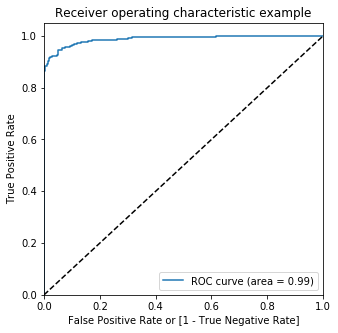

In [43]:
drawRoc(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

### Finding Optimal Cutoff Point

#### Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [68]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Class,Class_Prob,id,Class_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005055,8895,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.257842,5777,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.011237,5866,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.387423,10497,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.044219,35722,0,1,0,0,0,0,0,0,0,0,0,0


In [45]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521802  1.000000  0.000000
0.1   0.1  0.886628  0.983287  0.781155
0.2   0.2  0.927326  0.969359  0.881459
0.3   0.3  0.940407  0.952646  0.927052
0.4   0.4  0.944767  0.941504  0.948328
0.5   0.5  0.940407  0.922006  0.960486
0.6   0.6  0.946221  0.919220  0.975684
0.7   0.7  0.941860  0.902507  0.984802
0.8   0.8  0.936047  0.885794  0.990881
0.9   0.9  0.930233  0.869081  0.996960


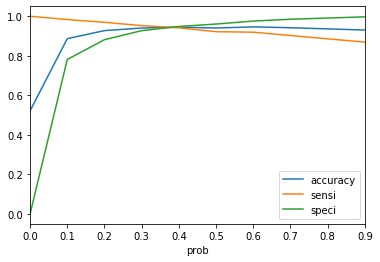

In [46]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, it seems 0.38 (slightly less than 0.4) is the optimal point to take it as a cutoff probability.

In [69]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Class,Class_Prob,id,Class_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005055,8895,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.257842,5777,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.011237,5866,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.387423,10497,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.044219,35722,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
y_train_pred_final['final_predicted'].value_counts()

1    357
0    331
Name: final_predicted, dtype: int64

## Get Confusion Matrix

In [49]:
cm = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted)
cm

array([[312,  17],
       [ 19, 340]], dtype=int64)

## Model Evaluation

In [50]:
accuracy = metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)*100
print("Accuracy: {0} %".format(round(accuracy, 2)))

Accuracy: 94.77 %


In [51]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted).ravel()
specificity = tn / (tn + fp)*100
print("Specificity: {0} %".format(round(specificity, 2)))

Specificity: 94.83 %


In [52]:
recall = metrics.recall_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)*100
print("Recall: {0} %".format(round(recall, 2)))

Recall: 94.71 %


In [53]:
precision = metrics.precision_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)*100
print("Precision: {0} %".format(round(precision, 2)))

Precision: 95.24 %


In [54]:
f1_score = metrics.f1_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)*100
print("F1-Score: {0} %".format(round(f1_score, 2)))

F1-Score: 94.97 %


In [55]:
print(metrics.classification_report(y_train_pred_final.Class, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       329
           1       0.95      0.95      0.95       359

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



## Conclusion

#### On the train data
- All the Metrics are giving the high score
- Model's accuracy is High
- Model's Recall/Sensitivity is also good around 94.71%
- This model seems to be working excellent on the traning Data

## Model Evaluation on the Test Data

In [56]:
y_test = test_set.pop('Class')
X_test = test_set

In [57]:
cols = X_train_sm.columns
X_test_final = X_test[cols.drop('const')]

X_test_final = sm.add_constant(X_test_final)
X_test_final.head()

,const,V4,V5,V8,V14,V22,V23,V27,V28,Amount
223572,1.0,5.036985,-0.376561,1.856839,-9.266120,-0.301432,-0.502433,0.514646,0.140999,-0.349231
88307,1.0,3.064156,-2.497914,1.268166,-4.549557,0.184087,-0.089452,0.322854,0.135268,0.366426
278483,1.0,0.057365,2.054166,-2.882775,0.898267,0.128156,-0.932627,-0.497222,0.162186,-0.293258
249607,1.0,3.728439,2.054166,1.457175,-5.757216,-0.978692,-0.278330,0.704915,-0.780152,-0.213296
229712,1.0,6.009415,0.216656,0.338527,-9.150951,-0.397435,-0.080006,0.648705,0.360224,-0.348512


In [58]:
y_test_pred = lm.predict(X_test_final)
y_test_pred = y_test_pred.values.reshape(-1)

In [59]:
y_test_pred_final = pd.DataFrame({'Class': y_test.values, 'Class_Prob': y_test_pred})
y_test_pred_final['id'] = y_test.index
y_test_pred_final.head()

,Class,Class_Prob,id
0,1,0.999999,223572
1,1,0.994502,88307
2,0,0.024881,278483
3,1,0.998355,249607
4,1,1.000000,229712


In [60]:
y_test_pred_final['Class_Predicted'] = y_test_pred_final.Class_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

,Class,Class_Prob,id,Class_Predicted
0,1,0.999999,223572,1
1,1,0.994502,88307,1
2,0,0.024881,278483,0
3,1,0.998355,249607,1
4,1,1.000000,229712,1


In [61]:
metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.Class_Predicted)

array([[153,  10],
       [ 15, 118]], dtype=int64)

In [62]:
accuracy = metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.Class_Predicted)*100
print("Accuracy: {0} %".format(round(accuracy, 2)))

Accuracy: 91.55 %


In [63]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.Class_Predicted).ravel()
specificity = tn / (tn + fp)*100
print("Specificity: {0} %".format(round(specificity, 2)))

Specificity: 93.87 %


In [64]:
recall = metrics.recall_score(y_test_pred_final.Class, y_test_pred_final.Class_Predicted)*100
print("Recall: {0} %".format(round(recall, 2)))

Recall: 88.72 %


In [65]:
precision = metrics.precision_score(y_test_pred_final.Class, y_test_pred_final.Class_Predicted)*100
print("Precision: {0} %".format(round(precision, 2)))

Precision: 92.19 %


In [66]:
f1_score = metrics.f1_score(y_test_pred_final.Class, y_test_pred_final.Class_Predicted)*100
print("F1-Score: {0} %".format(round(f1_score, 2)))

F1-Score: 90.42 %


# Final Conclusion:

- This Logistic regression model has high level of Accuracy and highly Sensitive to Fraud transaction.
- This model has high level of Sensitivity and it is predicting on the test data very accrately
- All the metrics values are almost same for both train and test data which shows that this model is very efficient in detecting the fradulent credit card transaction.

### On Train Data:

| Metrics | Score |
| :- | :- |
| Accuracy | 94.77 % |
| Specificity | 94.83 % |
| Recall / Sensitivity | 94.71 % |
| Precision | 95.24 % |
| F1-Score | 94.97 % |


### On Test Data:
| Metrics | Score |
| :- | :- |
| Accuracy | 91.55 % |
| Specificity | 93.87 % |
| Recall / Sensitivity | 82.72 % |
| Precision | 92.19 % |
| F1-Score | 90.42 % |

